# PHYS 641 Assignment 4
### Andrew V. Zwaniga (260843983) 
#### Due October 24 2018 

## Problem 1: Converting maps of the CMB 

### Part A: Expected variance of the CMB map 

#### Preamble

The __cosmic microwave background__ (CMB) is radiation that was produced at the moment when the universe became opaque to photons (before this time, according to the standard cosmological model, photons were scattering from electrons far too often to escape this process). These photons that were produced at the _time of last scattering_ then travelled freely through the universe. Due to expansion of the universe, today we observe these photons everywhere on the sky with a characteristic temperature of $T_{\text{CMB}} \approx 2.7~\text{K}$. 

If the sky is assumed to be approximately a blackbody in every direction, then the peak wavelength corresponding to this temperature is $\lambda_{\text{max}} \approx 931~\text{m}$ or $\nu_{\text{max}} \approx 320~\text{kHz}$. In connection with the temperature of the universe just before last-scattering (~400,000 years after the Big Bang), the explanation for the microwave frequency is that the universe has expanded enough since that time to stretch the wavelength of the photons as they propogate. 

When we observe the CMB radiation - with COBE, WMAP, or (more topically) Planck - we plot a map of the sky in some projection of a spherical surface to a plane that shows the temperature at each point in the sky (points become cells with finite angular resolution). We find fluctuations in this temperature (owing to cosmological reasons, such as baryonic acoustic oscillations) that can be modelled with the spherical harmonic functions. These are functions $Y_{l}^{m}(\theta, \phi)$ that satisfy a slew of mathematically interesting identities, but mainly are useful because they can be used to decompose a function into values on the unit sphere in $\mathbb{R}^{3}$. They are orthogonal in the following sense: 

$ \int_{0}^{2\pi}\int_{0}^{\pi}(Y_{l}^{m})^{*}Y_{l'}^{m'}\sin(\theta)d\theta d\phi = \delta_{ll'}\delta_{mm'}$.

Here, $\phi$ is the azimuthal angle and $\theta$ is the polar angle. The functional form is the associated Legendre polynomials multiplied by an azimuthal wave, 

$ Y_{l}^{m}(\theta,\phi) = \sqrt{\frac{(2l+1)}{4\pi}\frac{(l-m)!}{(l+m)!}}\exp(im\phi)P_{l}^{m}(\cos(\theta)),~~~~~~ m \geq 0$

and $Y_{l}^{-m} = (-1)^{m}(Y_{l}^{m})^{*}$.

#### A look at the power spectrum in `example_ps.txt`

In the code below, we read in the file `example_ps.txt`, assuming that the first column of the file contains values for $\mathcal{C}_{l}$. To obtain the power spectrum we calculate $\langle a_{lm}^{2} \rangle = C_{l} = \frac{2\pi}{l(l+1)}\mathcal{C}_{l}$. The temperature map $T(\theta, \phi)$ is a sum over spherical harmonics $Y_{l}^{m}(\theta, \phi)$ with coefficients determined by $a_{lm}$. The expectation is $\langle a_{lm} \rangle = 0$ since we assume Gaussian fluctuations. The expected variance of $T$ from data for $\mathcal(C)_{l}$ is 

$ \text{Var}[T] = \langle T^{2} \rangle - (\langle T \rangle)^{2} $

We have $\langle T \rangle = 0$ since $\langle a_{lm} \rangle = 0. $ So $ \text{Var}[T] = \langle T^{2} \rangle $. 

$ \langle T^{2} \rangle = \frac{1}{4\pi}\int\int(\sum\sum a_{lm}Y_{l}^{m})(\sum\sum a_{lm}Y_{l}^{m})^{*}d\Omega $ 

$ = \frac{1}{4\pi}\int\int\sum\sum a_{lm}a_{l'm'}^{*}Y_{l}^{m}Y_{l'}^{m'}d\Omega $ 

$ = \frac{1}{4\pi}\int\int\sum\sum a_{lm}a_{l'm'}^{*}\delta_{ll'}\delta_{mm'}d\Omega $ 

$ = \frac{1}{4\pi}\int\int\sum\sum \|a_{lm}\|^{2}d\Omega $

But $ C_{l} \equiv \frac{1}{2l+1}\sum_{m=-l}^{l}\|a_{lm}\|^{2} $ hence 

$ \langle T^{2} \rangle = \frac{1}{4\pi}\sum_{l=0}^{l_{\text{max}}}(2l+1)C_{l} $ 

The expected variance is 12077.826514389835.


<Figure size 432x288 with 0 Axes>

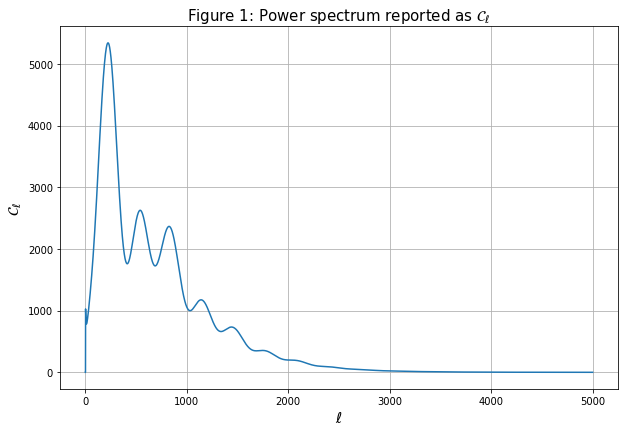

In [60]:
## Problem 1: Part A 

import numpy as np
import healpy as hp
import math

pi = math.pi

from matplotlib import pyplot as plt

skymap = hp.alm2map

file = open('example_ps.txt')
data = np.loadtxt(file, usecols=0) 

scriptC = data 
lmax    = len(data)
C       = np.zeros(lmax)
L       = np.arange(lmax)

for l in range(lmax):
    if l == 0: 
        C[l] = 0
    else: 
        C[l] = 2*pi*scriptC[l]/(l*(l+1))
        #C[l] = scriptC[l]/(l*(l+1))

summand = 0
for l in range(lmax):
    summand = summand + (2*l+1)*C[l]

varT = summand/(4*pi)
    
print('The expected variance is ' + str(varT) + '.')

plt.figure(1)
plt.figure(figsize=(10,20/3))
plt.title('Figure 1: Power spectrum reported as $\mathcal{C}_{\ell}$', size=15)
plt.xlabel('$\ell$', size=15)
plt.ylabel('$\mathcal{C}_{\ell}$', size=15)
plt.grid()
plt.plot(L, scriptC)


#### Part B: Making a temperature map of the sky from power spectrum data 

Given the data in `example_ps.txt` we can generate a (fake) set of coefficients $a_{lm}'$ which will really only depend on $l$ and we will have no way of knowing the coefficients for corresponding $m$-modes. For each $l$, pull a random number from a Gaussian distribution with mean $\mu_{l}' = \langle a_{lm} \rangle = 0$ and standard deviation $ \sigma_{l}' = \sqrt{\text{Var}[a_{lm}]} = \sqrt{\langle a_{lm}^{2} \rangle - (\langle a_{lm} \rangle)^{2}} = \sqrt{\frac{2\pi}{l(l+1)}\mathcal{C}_{l}} = \sqrt{C_{l}}$. 



Trial #1
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #2
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #3
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #4
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #5
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #6
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #7
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #8
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #9
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Trial #10
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
After 10 simulations, the average variance in the skymap is 9880.780548652208


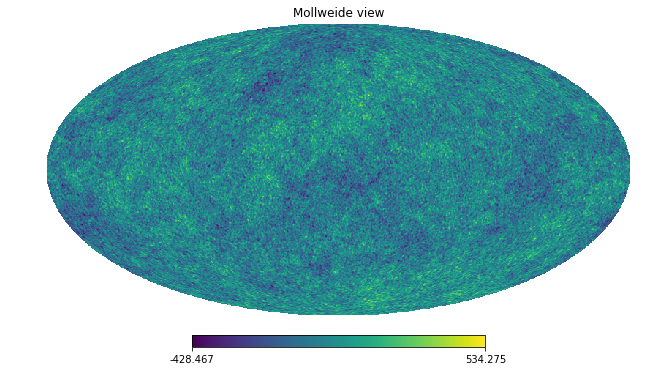

In [53]:
## Problem 1: Part B

import numpy as np 
import math 

import healpy as hp

from matplotlib import pyplot as plt
from pylab import *

pi = math.pi 

ll = 500     # this value is beyond the first peak which makes it a good choice 
mm = int(ll) 

n = int(mm*(2*ll+1-mm)/2 + ll + 1)

avg   = 0 
niter = 10
q     = 0

while q < niter: 

    print('Trial #' + str(q+1))
    alm_gen = []

    for m in range(mm):
        for l in range(m, ll):
            #print('[m, l] = [%d, %d]'%(m, l))
            # Loop over m's because alm vector that is fed into hp.alm2map() should be ordered in an array like 
            # [a00, a10, a20, a30, ..., almax0, a01, a11, a21, ..., almax1, a20, a21, a22, ..., ... almaxmmax]
            if l == 0: 
                alm_gen.append(np.random.normal(scale=np.sqrt(C[l]))+ 0.J)
            else: 
                alm_gen.append((np.random.normal(scale=np.sqrt(C[l])) + 
                            1.J*np.random.normal(scale=np.sqrt(C[l])))/np.sqrt(2))

    alm_gen = np.array(alm_gen, dtype='complex')
    # Now, use HealPy to generate a map of the sky 

    skymap     = hp.alm2map(alm_gen, nside=512)
    var_skymap = (np.std(skymap))**2

    if q == niter-1:
        hp.mollview(skymap)
    
    avg = avg + var_skymap
    #print('Variance in the generated map is ' + str(var_skymap))
    q = q + 1 

avg = avg/niter 
print('After ' + str(niter) + ' simulations, the average variance in the skymap is ' + str(avg))

We can see that our expectation variance is larger than the average variance in the skymap by a factor of about 1.2, which is close to the exact number $\frac{4}{\pi}\approx 1.2732$ so this may be missing from the estimated variance.  

### Part C: Comparing the input and generated power spectra

Using `healpy.anafast(map)` we can convert the sky map back into $a_{lm}$'s and compare with the original input data. 


1536
(1536,)


<Figure size 432x288 with 0 Axes>

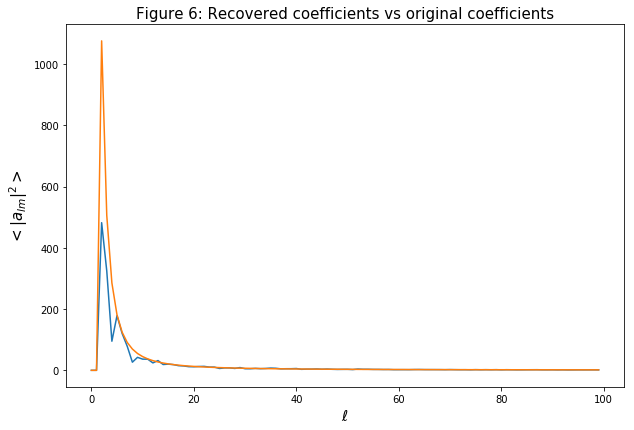

In [52]:
## Problem 1: Part C 

recovered_alm2 = hp.anafast(skymap)
print(recovered_alm2.size)
print(recovered_alm2.shape)

laxis = np.arange(1536)

plt.figure(1)
plt.figure(figsize=(10,20/3))
plt.title('Figure 6: Recovered coefficients vs original coefficients', size=15)
plt.xlabel('$\ell$', size=15)
plt.ylabel('$<\|a_{lm}\|^{2}>$', size=15)
plt.plot(recovered_alm2[:100])
plt.plot(C[:100])

We can see that the recovered coefficients compare well with the input. 

### Part d: Generating coefficients using `healpy.synalm` and `healpy.synfast` 

For the use of `healpy.synalm`, generate a random vector containing values for $C_{l}$. The function returns a set of $a_{lm}$. Then use `healpy.alm2sky` to get a corresponding map. Then use `healpy.anafast` to get $a_{lm}'$ and compare with $a_{lm}$. Hopefully they are similar but who knows. 

/anaconda3/lib/python3.6/site-packages/healpy/sphtfunc.py:295: FutureChangeWarning: The order of the input cl's will change in a future release.
Use new=True keyword to start using the new order.
See documentation of healpy.synalm.
  category=FutureChangeWarning)


Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


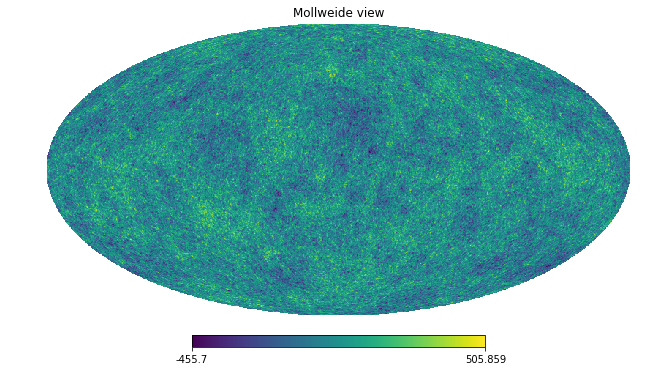

In [56]:
import numpy as np
import healpy as hp
import math

from matplotlib import pyplot
    
alm = hp.synalm(C)
sky = hp.alm2map(alm, nside=512)
hp.mollview(sky)

rec_alm = hp.anafast(sky) # recover alm 


This compares nicely with the sky map that was obtained from the power spectrum data in the provided file. 

## Problem 2: Flat sky region 

### Part A: Conversion between $k$ and $l$ 

The discrete Fourier transform of a discrete bounded and continuous function $f: \mathbb{R}^{2} \to \mathbb{R}$ is

$ F(k_{x}, k_{y}) = \sum_{k_{x}=0}^{k_{x,\text{max}}}\sum_{k_{y}=0}^{k_{y,\text{max}}}f(x,y)\exp\Big{[}-2\pi i\Big{(}\frac{k_{x}x}{N}+\frac{k_{y}y}{M}\Big{)}\Big{]} = \sum_{k_{x}=0}^{k_{x,\text{max}}}\sum_{k_{y}=0}^{k_{y,\text{max}}}f(x,y)\exp\Big{[}-\frac{2\pi i\mathbf{k}\cdot\mathbf{x}}{N}\Big{]} $

A region on the sky of angular dimensions 20 by 20 degrees, or $\frac{\pi}{9}$ by $\frac{\pi}{9}$ radians, can be viewed as a Euclidean surface in $\mathbb{R}^{2}$.

Roughly, the conversion between $l$ (from spherical harmonic decomposition of $f$) and $k$ (from Euclidean harmonic decomposition of $f$) is 

$ l \approx \frac{2\pi k}{d}~~~~~~~(*)$

where $d$ is the width of the planar region. So if $d = \frac{\pi}{9} $ then $ l \approx 18k$. The smallest $l$ we should go to is thus $l=18$.

### Part B: 

Given $l_{\text{max}}$, we have $k_{\text{max}} = \frac{l_{\text{max}}}{18}$ the number of coefficients is 

$ \sum_{l=0}^{l_{\text{max}}}\sum_{m=-l}^{l}1 = \sum_{l=0}^{l_{\text{max}}}(2l+1) = 2\sum_{l=0}^{l_{\text{max}}}l +1 = 2[\frac{1}{2}l_{\text{max}}(l_{\text{max}}+1)]+1 = l_{\text{max}}(l_{\text{max}}+1)+1$ 

Now, $ k = \sqrt{k_{x}^{2}+k_{y}^{2}} $ so $ k_{\text{max}} = \sqrt{k_{x,\text{max}}^{2}+k_{y,\text{max}}^{2}} = \frac{l_{\text{max}}}{18}$. 

The solution is $k_{x,\text{max}} = k_{y,\text{max}} = \frac{l_{\text{max}}}{\sqrt{2}18}$. The number of modes is then the product $k_{x,\text{max}}\times k_{y,\text{max}} = \frac{l_{max}^{2}}{648}$.

In [61]:
no_alms = lmax*(lmax+1)+1

kmax = int(lmax/18)

no_kmodes = int(lmax**2/648)

print('For lmax = ' + str(lmax) + ', number of alms is ' + str(no_alms) + '. Number of k modes is ' + str(no_kmodes))

For lmax = 5001, number of alms is 25015003. Number of k modes is 38595


### Part C: 

For a given $l_{\text{max}}$ the maximum pixel size should be the width angular width of the sky region to be imaged divided by $k_{x,max}$. So for a flat sky region of width $20^{\circ}\times20^{\circ}$ the maximum pixel size is 

$ p_{\text{max}} = \frac{20^{\circ}}{k_{\text{x,max}}} = \frac{\sqrt{2}\times18\times20^{\circ}}{l_{\text{max}}}$ 

In [64]:
pmax = (np.sqrt(2)*18*20)/lmax
print('For lmax = %d the maximum pixel size is %.2f deg' %(lmax, pmax))

For lmax = 5001 the maximum pixel size is 0.10 deg


In [114]:
# Creating a flat 20x20 deg2 sky map from the data file `example_ps.txt` 

import numpy as np
import math 
from matplotlib import pyplot as plt 

factor = 0.1 
width = 20 # deg 
npix = int(width/(pmax*factor)) # 10% of max 

q = np.arange(npix)
q[q>npix/2] = q[q>npix/2] - npix 

kx = np.repeat([q], npix, axis=0)
ky = kx.transpose()
k  = np.sqrt(kx**2+ky**2)

a = []

for l in range(len(C)): 
    # C is from problem 1 
    
    if l%18 == 0:
        a.append(np.random.normal(scale=np.sqrt(C[l])))

a = np.asarray(a)

flatskymap = np.zeros([npix,npix])

for ii in range(len(kx)):
    for jj in range(len(ky)):
        kk = int(np.sqrt(ii**2+jj**2))
        #print(str(kk) + ' | ' + str(int(kk*18*factor)))
        #flatskymap[ii][jj] = np.random.normal()*np.sqrt(C[int(kk*18*factor)])
        flatskymap[ii][jj] = np.random.normal(scale=np.sqrt(C[int(kk*18*factor)]))
        
transform = np.fft.fft2(flatskymap)

### Part D

The standard deviation in the flat sky map is 39524.47463760759


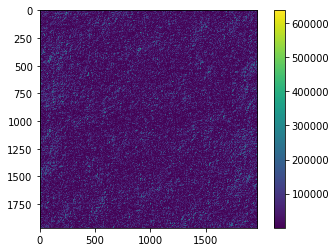

In [115]:
ps = np.real(np.conj(transform)*transform)
print('The standard deviation in the flat sky map is ' + str(np.std(ps)))
plt.imshow(ps)
plt.colorbar()

We can see that the standard deviation in the flat sky map is larger than the expected variance from problem 1 by a factor of roughly $\pi$ so either there is still something slightly wrong with that estimate, or I've done the sky map incorrectly. 

### Unrelated

In [66]:
# Creating flat sky maps from Gaussian noise 
# To get a handle on using fft2 

import numpy as np 
import time 
import healpy 

from matplotlib import pyplot as plt

npix = 2000
k    = np.arange(npix)
k[k>npix/2] = k[k>npix/2] - npix 

kx = np.repeat([k], npix, axis=0)
ky = kx.transpose() 
k  = np.sqrt(kx**2+ky**2)

amp = 1/(1.0 + k)**1.5 

# Now generate Gaussian random numbers with appropriate phase 
# relations so as to be the transform of a real field: this is 
# done by taking the transform of a real field! 

map    = np.random.randn(npix, npix) # random noise map 
ft_map = np.fft.fft2(map)            # FT of random noise map 

# Another way to generatre data with the required symmetry i.e. 
#          F(kx, ky) = F(-kx, -ky)* 
# is to do the following (note the careful handling of kx=0, ky=0 axes)

# Carefully handled the kx = 0 and ky = 0 axes!
# real part 
rft_map2        = np.random.randn(npix, npix)
rft_map2[1:,0]  = rft_map2[1:,0]  + np.flipud(rft_map2[1:,0])
rft_map2[0,1:]  = rft_map2[0,1:]  + np.flipud(rft_map2[0,1:])
rft_map2[1:,1:] = rft_map2[1:,1:] + np.flipud(np.fliplr(rft_map2[1:,1:]))

# imaginary part 
ift_map2        = np.random.randn(npix, npix)
ift_map2[1:,0]  = ift_map2[1:,0]  + np.flipud(ift_map2[1:,0])
ift_map2[0,1:]  = ift_map2[0,1:]  + np.flipud(ift_map2[0,1:])
ift_map2[1:,1:] = ift_map2[1:,1:] + np.flipud(np.fliplr(ift_map2[1:,1:]))
ift_map2[0,0]   = 0

ft_map2 = rft_map2 + 1.J*ift_map2

map_back  = np.fft.ifft2(ft_map*amp)
map_back  = np.real(map_back)
map2_back = np.real(np.fft.ifft2(ft_map2*amp))

#plt.imshow(map)
#plt.imshow(np.real(ft_map))
#plt.imshow(np.real(ft_map2))
#plt.imshow(map_back)
#plt.imshow(map2_back)

### Problem 3 

#### Part A 

The Planck function for wavelength $\lambda$ and temperature $T$ is 

$ B_{\nu}(\nu,T) = \frac{2h\nu^{3}}{c^{2}}\Big{[}{\exp\big{(}\frac{h\nu}{kT}\big{)}-1}\Big{]}^{-1} $ 

with units of $ \text{erg}\cdot\text{s}^{-1}\cdot\text{cm}^{-2}\cdot\text{Hz}^{-1}\cdot\text{sr}^{-1} $ 

Typical CMB detectors have a collecting area of $\lambda_{\text{det}}^{2}$ where $\lambda_{\text{det}}$ is the nominal wavelength, related to the nominal frequency $\nu_{\text{det}}$ in the usual way with the wave equation $c=\nu\lambda$, and these detectors see a solid angle of 1 sr. If the temperature of the CMB is $T = 2.725~\text{K}$, find the number of erg/s/Hz hitting a $\nu_{\text{det}} = 150~\text{GHz}$ detector.

The answer is $ P(\nu=\nu_{\text{det}}, T=T_{\text{CMB}}) \cdot A \cdot \Omega$ for collecting area $A$ and solid angle $\Omega$. 

In [118]:
nom_nu  = 150e9 # Hz 
nom_lam = c/nom_nu

In [133]:
import numpy as np

T_CMB = 2.735 # K 

h = 6.626e-34 # Js 
k = 1.38e-23 # J/K 
c = 3e8 # m/s

A = nom_lam**2 # m^2 
W = 1 # sr 

P = (2*h*nom_nu**3)/(c**3)*(np.exp((h*nom_nu)/(k*T_CMB))-1)**(-1)
answer = P*A*W*1e7 # convert to ergs 
print('The number of ergs per second per Hz falling on the sensitive area is %.4e erg/s/Hz' % answer)

The number of ergs per second per Hz falling on the sensitive area is 5.1284e-25 erg/s/Hz


### Part B 

To calculate the number of photons per second hitting the detector, we divide out the black body spectrum function by the energy of the photon with frequency $\nu$ and integrate over the bandwidth $\Delta\nu=30~\text{GHz}$. 

$ \int_{\nu_{\text{low}}}^{\nu_{\text{high}}}\frac{B_{\nu}(\nu,T)\lambda_{\text{nom}}^{2} }{E_{\nu}}d\nu \approx \Delta\nu\frac{B_{\nu}(\nu_{\text{det}}, T)}{E_{\nu_{\text{det}}}}\lambda_{\text{nom}}^{2} $.

$ = \Delta\nu\frac{2\nu_{\text{det}}^{2}}{c^{2}}\Big{[}\exp\big{(}\frac{h\nu_{\text{det}}}{kT_{\text{CMB}}}-1\big{)}\Big{]}^{-1}\lambda_{\text{nom}}^{2}  $ 

In [136]:
Deltanu = 30e9 # Hz

answer2 = (Deltanu*2*nom_nu**2/c**2)*(np.exp((h*nom_nu)/(k*T_CMB))-1)**(-1)*nom_lam**2
print('The number of photons per second entering the detector is %.4e' % answer2)

The number of photons per second entering the detector is 4.6439e+09


We can see that the photon rate is on the order of 4.6 GHz which is less than half the bandwidth so we are in the continuous noise regime. If the photon rate was larger than twice the bandwidth the detector's noise would be determined by shot noise. 

### Part C

The noise in the continuous limit is given by $ \delta T = \frac{T_{\text{CMB}}}{\sqrt{\Delta \nu~\tau}}$ 

so the noise in 1 second is $ \delta T = \frac{T_{\text{CMB}}}{\sqrt{\Delta \nu}}$ 


In [152]:
print('Noise = ' + str(1e6*T_CMB/np.sqrt(Deltanu)) + ' uK s^-1/2')

Noise = 15.790529862336264 uK s^-1/2


In comparison with detectors that have a $50~\mu\text{K}\cdot\text{s}^{-0.5}$ noise, the result here is better by a factor of just over 3. 

I am not sure what is meant by the last part of this question: "Can a next-gen CMB satellite get to much deeper maps just by improving the detector." I don't see what the connection is between the answer to this and the result I just obtained above - maybe it's because I'm not an expert on CMB telescopes. 

I naively expect that if you have lower noise as I just found above (assuming it's correct...) then that is a good thing and you will get a better CMB map. But at the same time I don't know what structures one would hope to resolve with a less noisy map. 

However, I guess you might try to make your bandwidth too small in the pursuit of making the noise in your map smaller, which will push your detector into the shot noise which would be bad. 